In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential


In [3]:
df=pd.read_csv("E:\\diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Without regularization

Epoch 1/30
16/16 [==============================] - 1s 9ms/step - loss: 0.8506 - accuracy: 0.3259 - val_loss: 0.7556 - val_accuracy: 0.3577
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.4012 - val_loss: 0.7012 - val_accuracy: 0.4634
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.5662 - val_loss: 0.6523 - val_accuracy: 0.6829
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.7189 - val_loss: 0.6107 - val_accuracy: 0.7236
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5828 - accuracy: 0.7434 - val_loss: 0.5759 - val_accuracy: 0.7317
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7617 - val_loss: 0.5434 - val_accuracy: 0.7317
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.7576 - val_loss: 0.5221 - val_accuracy: 0.7317
Epoch 8/30
16/16 [==

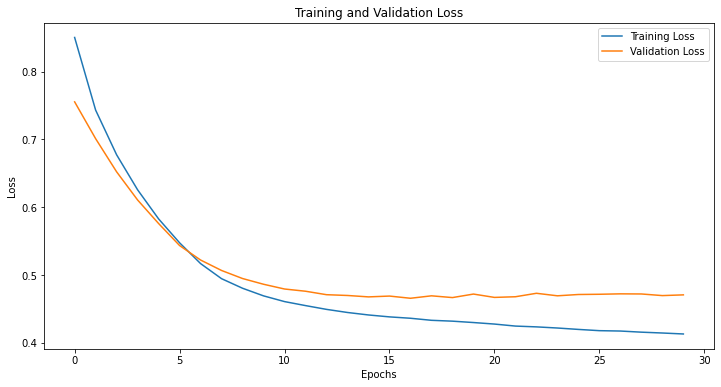

5/5 [==============================] - 0s 1ms/step - loss: 0.5557 - accuracy: 0.7468
Test Loss: 0.5557
Test Accuracy: 0.7468
5/5 [==============================] - 0s 885us/step
Confusion Matrix:
[[79 20]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        99
           1       0.64      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [11]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a multilayer feedforward neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32,verbose=1)

# Plot training and testing loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
y_pred = np.round(model.predict(X_test)).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# With Earlystoppping

Epoch 1/30
16/16 [==============================] - 1s 8ms/step - loss: 0.6823 - accuracy: 0.5540 - val_loss: 0.6360 - val_accuracy: 0.6748
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6080 - accuracy: 0.6640 - val_loss: 0.5967 - val_accuracy: 0.7073
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7067 - val_loss: 0.5725 - val_accuracy: 0.6992
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7210 - val_loss: 0.5481 - val_accuracy: 0.7236
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7373 - val_loss: 0.5246 - val_accuracy: 0.7073
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7576 - val_loss: 0.5061 - val_accuracy: 0.6992
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7739 - val_loss: 0.4929 - val_accuracy: 0.7154
Epoch 8/30
16/16 [==

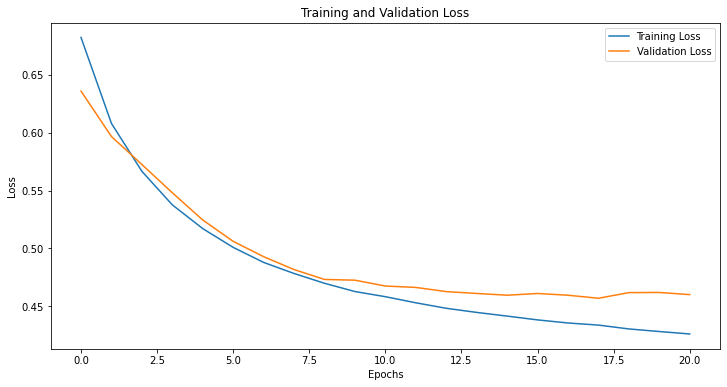

5/5 [==============================] - 0s 1ms/step - loss: 0.5156 - accuracy: 0.7532
Test Loss: 0.5156
Test Accuracy: 0.7532
5/5 [==============================] - 0s 1ms/step
Confusion Matrix:
[[80 19]
 [19 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [13]:

from tensorflow.keras.callbacks import EarlyStopping

# Create a multilayer feedforward neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[early_stopping], verbose=1)

# Plot training and testing loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
y_pred = np.round(model.predict(X_test)).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Dropout

Epoch 1/30
8/8 [==============================] - 1s 15ms/step - loss: 0.8368 - accuracy: 0.3707 - val_loss: 0.6936 - val_accuracy: 0.4878
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 0.7540 - accuracy: 0.4745 - val_loss: 0.6603 - val_accuracy: 0.6341
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5356 - val_loss: 0.6376 - val_accuracy: 0.7154
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.6667 - accuracy: 0.6171 - val_loss: 0.6211 - val_accuracy: 0.7398
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6314 - val_loss: 0.6088 - val_accuracy: 0.6911
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6200 - accuracy: 0.6925 - val_loss: 0.5980 - val_accuracy: 0.6992
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6117 - accuracy: 0.6802 - val_loss: 0.5882 - val_accuracy: 0.6829
Epoch 8/30
8/8 [=================

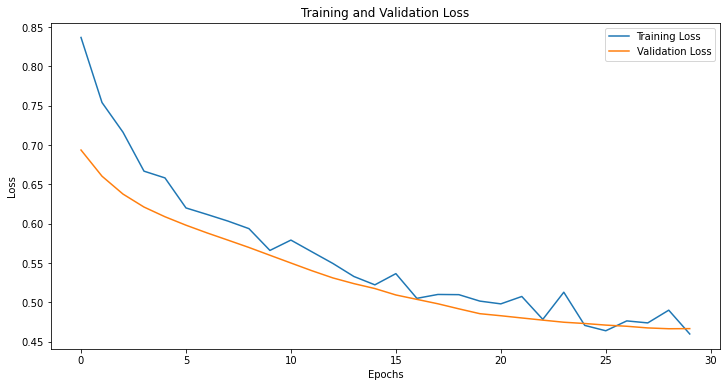

5/5 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.7532
Test Loss: 0.5211
Test Accuracy: 0.7532
5/5 [==============================] - 0s 0s/step
Confusion Matrix:
[[82 17]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [18]:

from keras.layers import  Dropout
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[early_stopping], verbose=1)

# Plot training and testing loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
y_pred = np.round(model.predict(X_test)).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Regularizers

Epoch 1/30
8/8 [==============================] - 1s 18ms/step - loss: 1.2666 - accuracy: 0.4501 - val_loss: 1.2451 - val_accuracy: 0.4634
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 1.2372 - accuracy: 0.4969 - val_loss: 1.2211 - val_accuracy: 0.4715
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 1.2099 - accuracy: 0.5499 - val_loss: 1.1987 - val_accuracy: 0.5285
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 1.1850 - accuracy: 0.5743 - val_loss: 1.1774 - val_accuracy: 0.5691
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 1.1623 - accuracy: 0.5906 - val_loss: 1.1577 - val_accuracy: 0.5935
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 1.1413 - accuracy: 0.6212 - val_loss: 1.1389 - val_accuracy: 0.6179
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 1.1206 - accuracy: 0.6253 - val_loss: 1.1209 - val_accuracy: 0.6260
Epoch 8/30
8/8 [=================

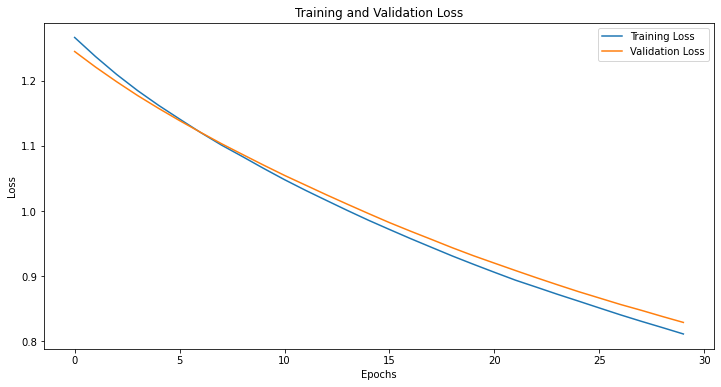

5/5 [==============================] - 0s 1ms/step - loss: 0.8088 - accuracy: 0.7922
Test Loss: 0.8088
Test Accuracy: 0.7922
5/5 [==============================] - 0s 1ms/step
Confusion Matrix:
[[89 10]
 [22 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        99
           1       0.77      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [20]:
from keras import regularizers
   
model = Sequential([
    Dense(12, input_dim=X.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[early_stopping], verbose=1)

# Plot training and testing loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
y_pred = np.round(model.predict(X_test)).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/30
8/8 [==============================] - 1s 20ms/step - loss: 0.8350 - accuracy: 0.6538 - val_loss: 0.8283 - val_accuracy: 0.6585
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.8207 - accuracy: 0.6925 - val_loss: 0.8190 - val_accuracy: 0.6260
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.8080 - accuracy: 0.7108 - val_loss: 0.8090 - val_accuracy: 0.6504
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.7959 - accuracy: 0.7251 - val_loss: 0.7992 - val_accuracy: 0.6504
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 0.7844 - accuracy: 0.7169 - val_loss: 0.7893 - val_accuracy: 0.6585
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.7722 - accuracy: 0.7169 - val_loss: 0.7791 - val_accuracy: 0.6504
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.7605 - accuracy: 0.7149 - val_loss: 0.7683 - val_accuracy: 0.6504
Epoch 8/30
8/8 [=================

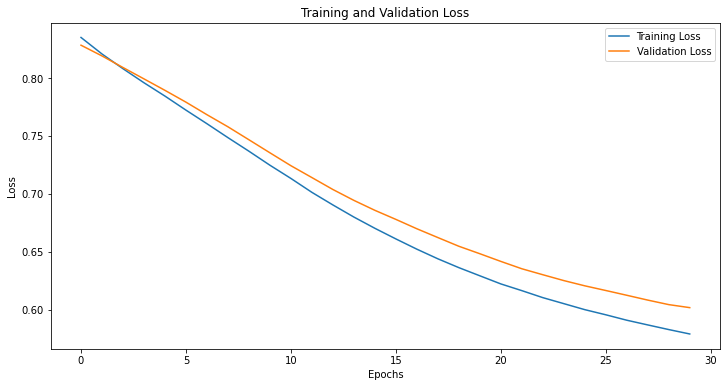

5/5 [==============================] - 0s 1ms/step - loss: 0.6257 - accuracy: 0.7792
Test Loss: 0.6257
Test Accuracy: 0.7792
5/5 [==============================] - 0s 907us/step
Confusion Matrix:
[[87 12]
 [22 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [21]:
from keras import regularizers
   
model = Sequential([
    Dense(12, input_dim=X.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[early_stopping], verbose=1)

# Plot training and testing loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predictions
y_pred = np.round(model.predict(X_test)).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))